# Visualization of Bank App Reviews Sentiment and Thematic Analysis

This notebook visualizes the sentiment and thematic analysis results of bank app reviews.
Plots are displayed inline and saved to `outputs/visualization/`.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Loaded sentiment data from ../data/processed/bank_app_reviews_sentiment.csv and ../data/processed/bank_app_reviews_sentiment_aggregated.csv
Loaded thematic data from ../data/processed/bank_app_reviews_thematic.csv


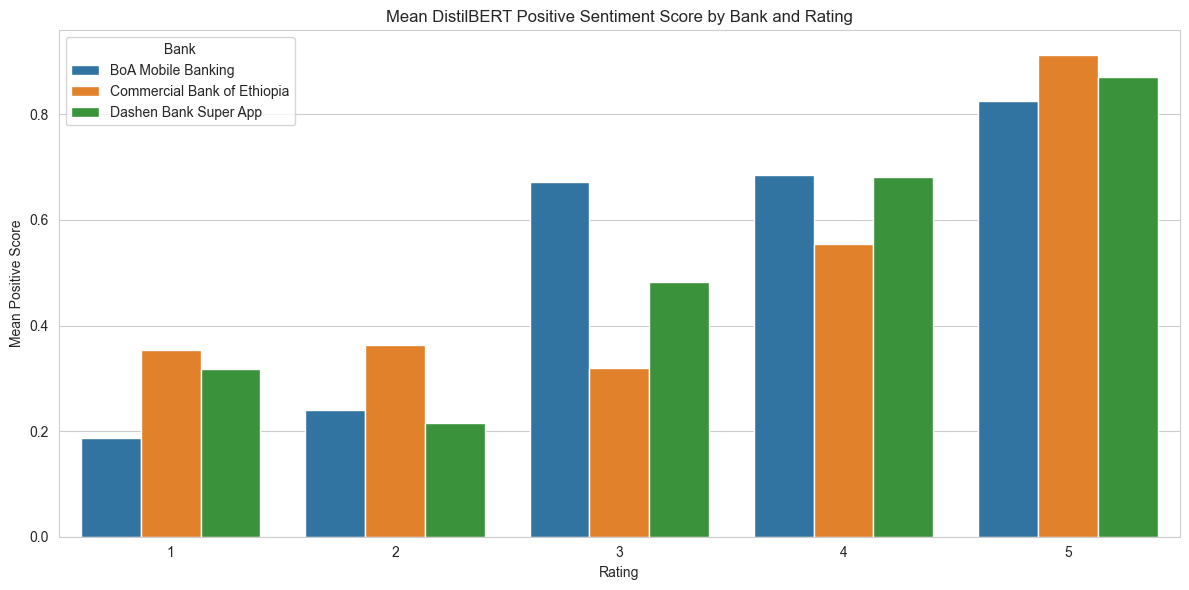

Saved DistilBERT positive sentiment plot


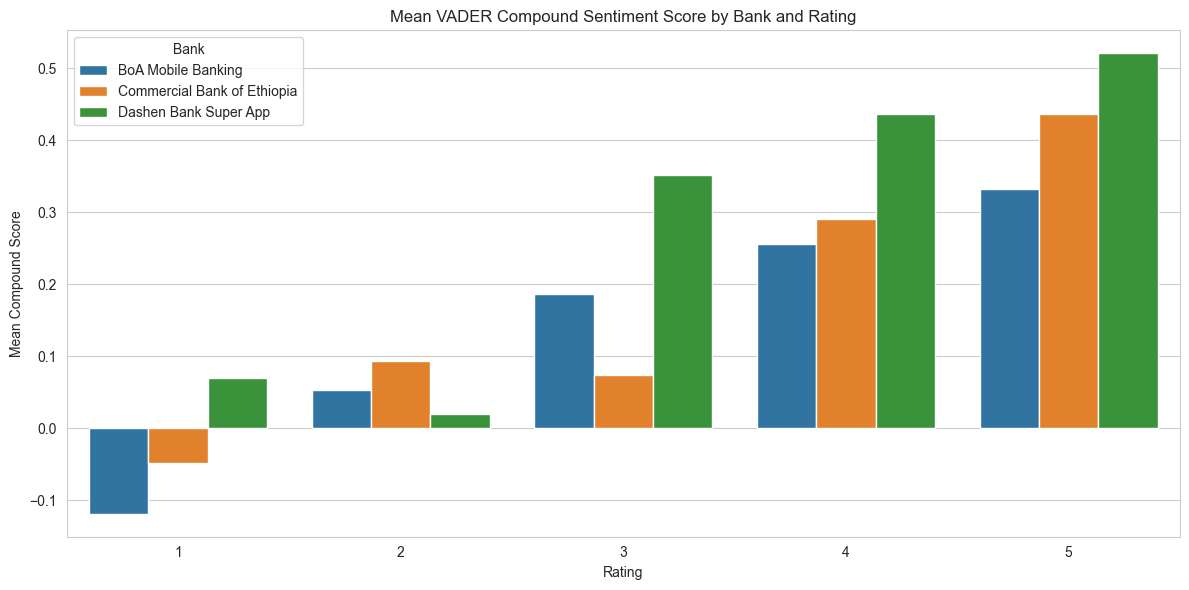

Saved VADER compound sentiment plot


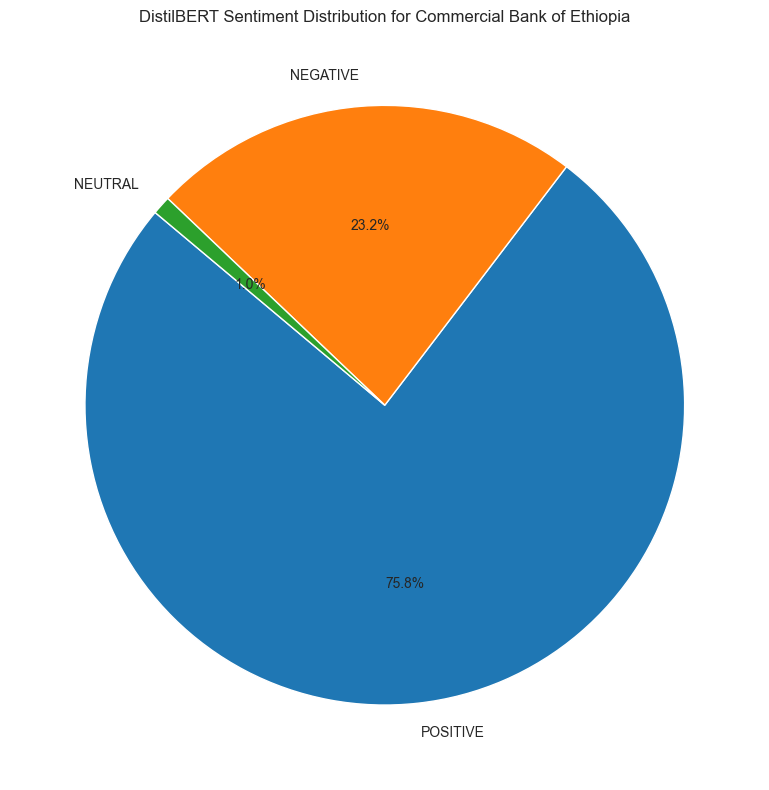

Saved sentiment distribution plot for Commercial Bank of Ethiopia


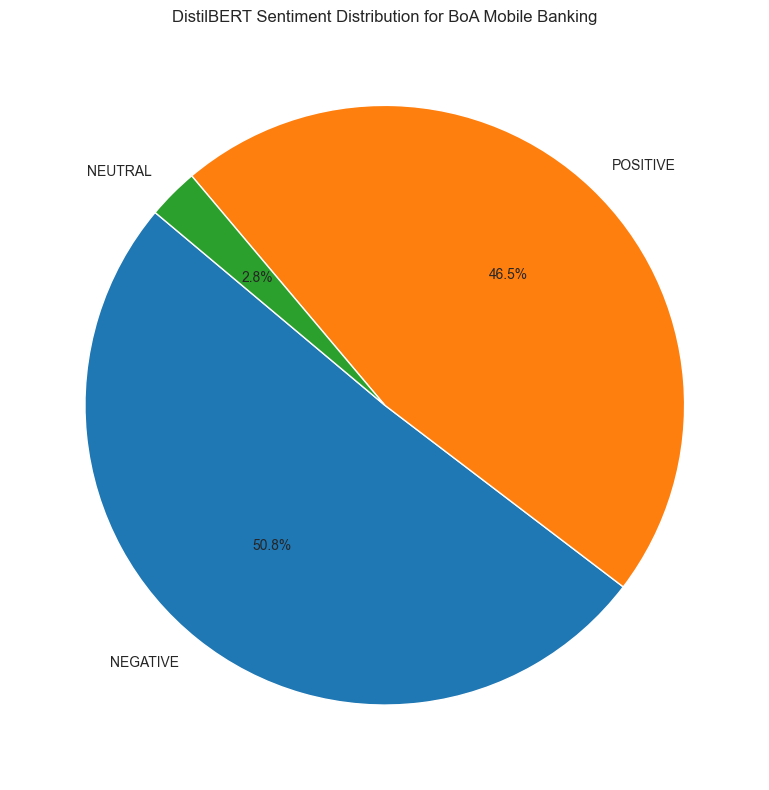

Saved sentiment distribution plot for BoA Mobile Banking


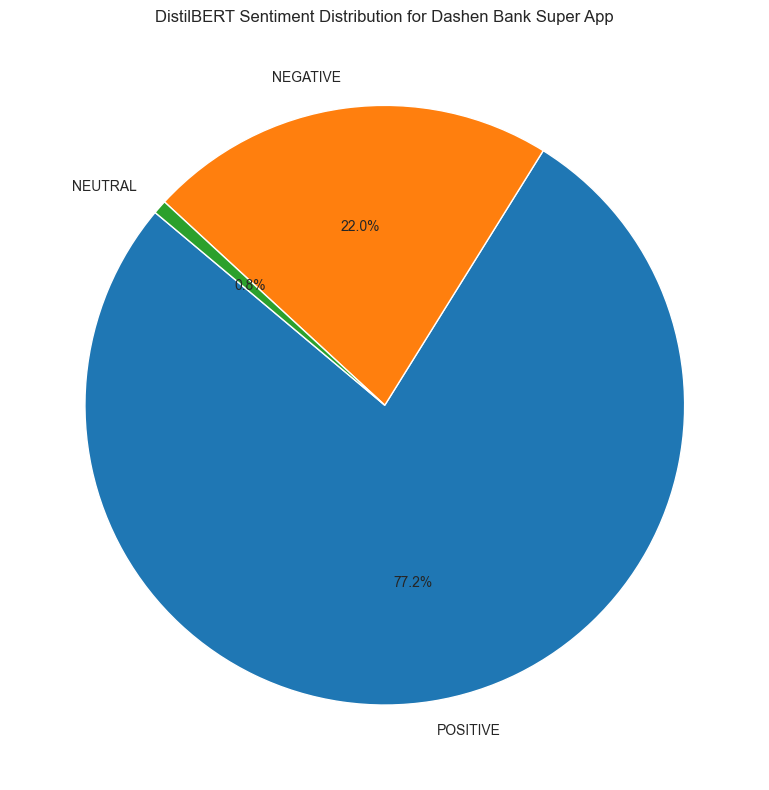

Saved sentiment distribution plot for Dashen Bank Super App


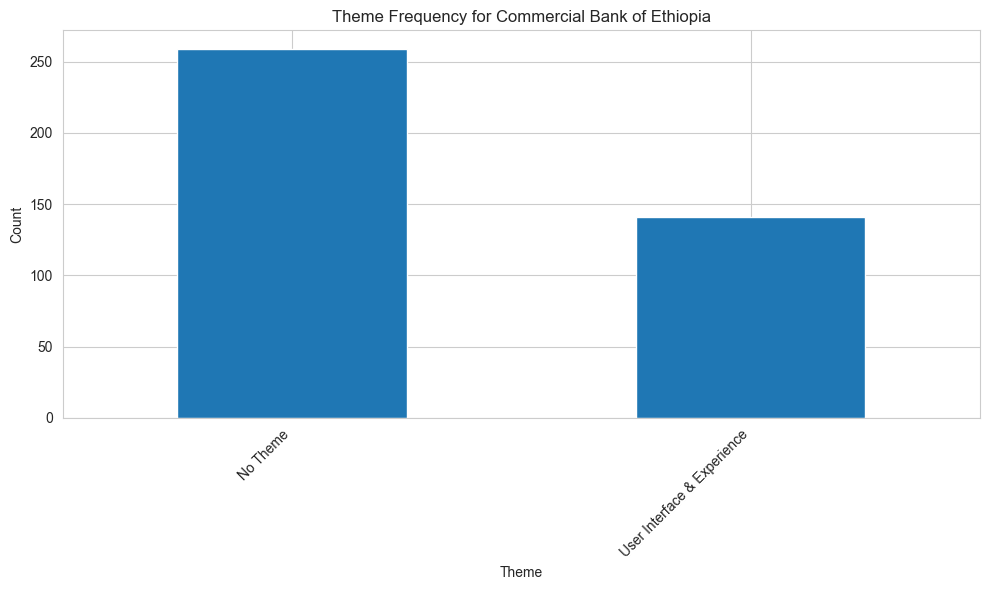

Saved theme frequency plot for Commercial Bank of Ethiopia


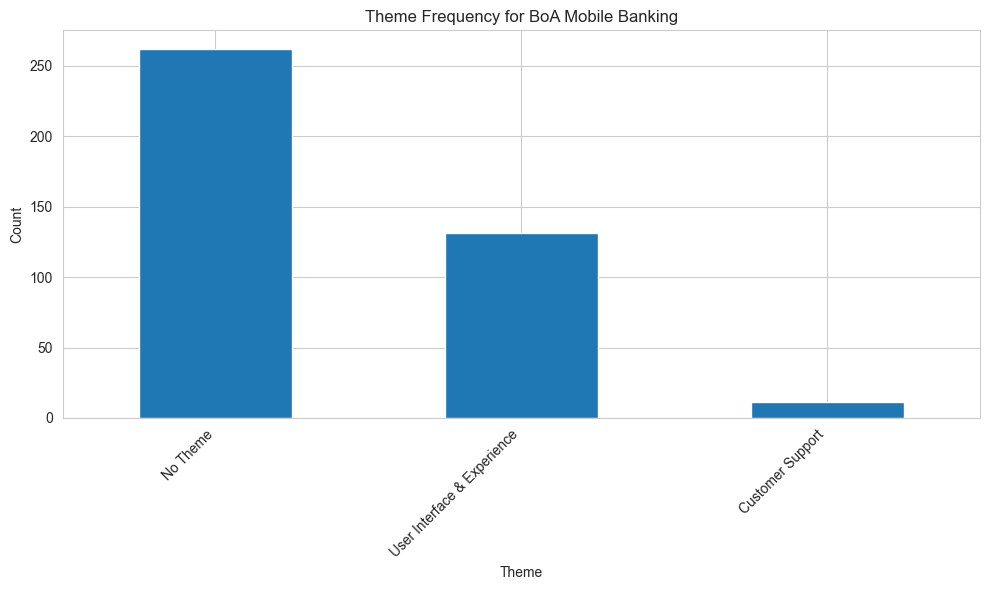

Saved theme frequency plot for BoA Mobile Banking


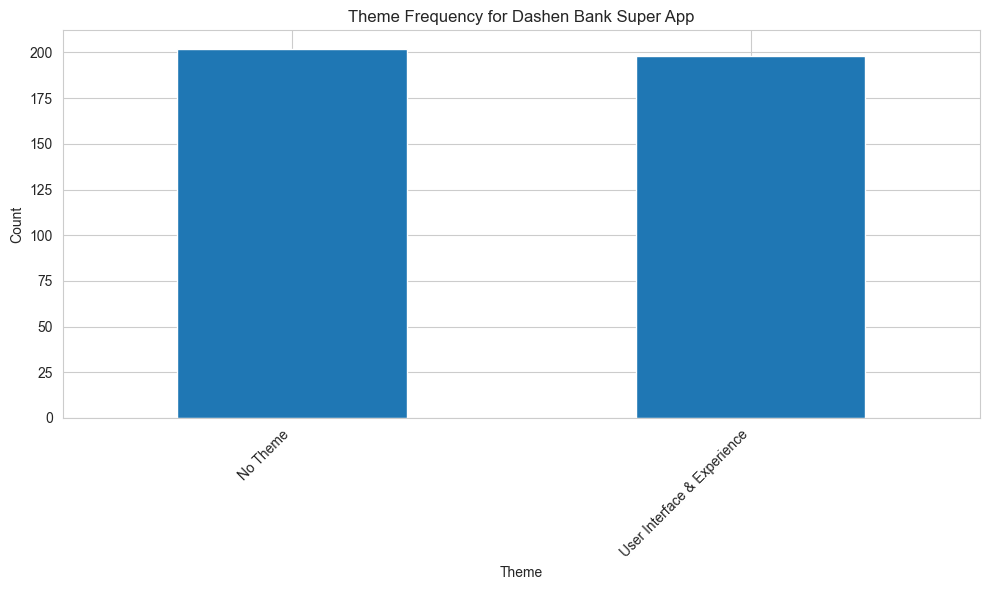

Saved theme frequency plot for Dashen Bank Super App


<Figure size 1200x600 with 0 Axes>

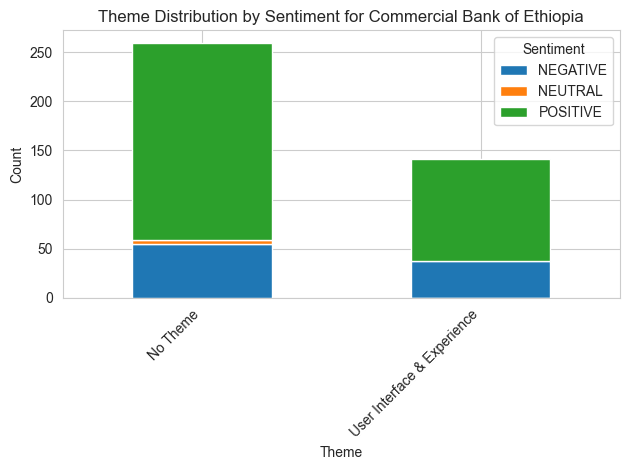

Saved theme by sentiment plot for Commercial Bank of Ethiopia


<Figure size 1200x600 with 0 Axes>

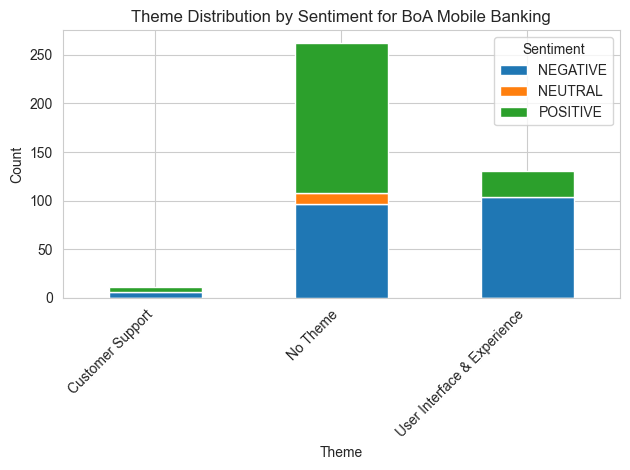

Saved theme by sentiment plot for BoA Mobile Banking


<Figure size 1200x600 with 0 Axes>

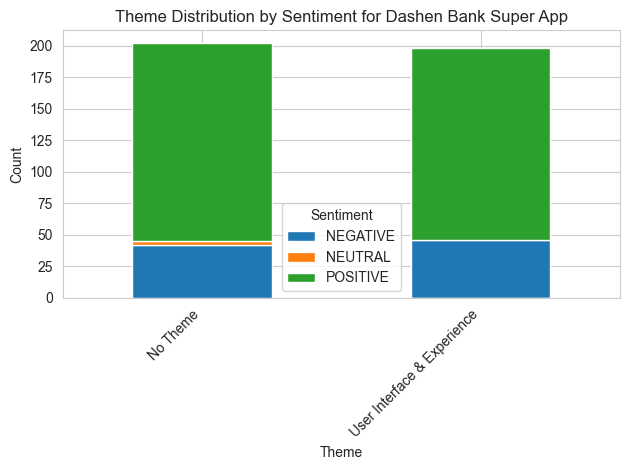

Saved theme by sentiment plot for Dashen Bank Super App


In [2]:
# Set plot style
sns.set_style('whitegrid')
%matplotlib inline

def load_data(sentiment_file, sentiment_agg_file, thematic_file):
    """Load the sentiment and thematic analysis CSVs."""
    try:
        sentiment_df = pd.read_csv(sentiment_file)
        sentiment_agg_df = pd.read_csv(sentiment_agg_file)
        thematic_df = pd.read_csv(thematic_file)
        print(f"Loaded sentiment data from {sentiment_file} and {sentiment_agg_file}")
        print(f"Loaded thematic data from {thematic_file}")
        return sentiment_df, sentiment_agg_df, thematic_df
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None, None, None

def plot_sentiment_by_bank_rating(sentiment_agg_df, output_dir):
    """Plot mean sentiment scores by bank and rating."""
    # DistilBERT Positive Score
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sentiment_agg_df, x='rating', y='distilbert_positive', hue='bank')
    plt.title('Mean DistilBERT Positive Sentiment Score by Bank and Rating')
    plt.xlabel('Rating')
    plt.ylabel('Mean Positive Score')
    plt.legend(title='Bank')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'distilbert_positive_by_bank_rating.png'))
    plt.show()
    print("Saved DistilBERT positive sentiment plot")

    # VADER Compound Score
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sentiment_agg_df, x='rating', y='vader_compound', hue='bank')
    plt.title('Mean VADER Compound Sentiment Score by Bank and Rating')
    plt.xlabel('Rating')
    plt.ylabel('Mean Compound Score')
    plt.legend(title='Bank')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'vader_compound_by_bank_rating.png'))
    plt.show()
    print("Saved VADER compound sentiment plot")

def plot_sentiment_distribution(sentiment_df, output_dir):
    """Plot distribution of DistilBERT sentiment labels per bank."""
    for bank in sentiment_df['bank'].unique():
        bank_data = sentiment_df[sentiment_df['bank'] == bank]
        sentiment_counts = bank_data['distilbert_label'].value_counts(dropna=False)
        
        plt.figure(figsize=(8, 8))
        plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'DistilBERT Sentiment Distribution for {bank}')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'sentiment_distribution_{bank.lower().replace(" ", "_")}.png'))
        plt.show()
        print(f"Saved sentiment distribution plot for {bank}")

def plot_theme_frequency(thematic_df, output_dir):
    """Plot frequency of themes per bank."""
    for bank in thematic_df['bank'].unique():
        bank_data = thematic_df[thematic_df['bank'] == bank]
        # Split themes and count
        theme_counts = bank_data['themes'].str.split(';', expand=True).stack().value_counts()
        
        plt.figure(figsize=(10, 6))
        theme_counts.plot(kind='bar')
        plt.title(f'Theme Frequency for {bank}')
        plt.xlabel('Theme')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'theme_frequency_{bank.lower().replace(" ", "_")}.png'))
        plt.show()
        print(f"Saved theme frequency plot for {bank}")

def plot_theme_by_sentiment(thematic_df, output_dir):
    """Plot stacked bar chart of themes by sentiment label per bank."""
    for bank in thematic_df['bank'].unique():
        bank_data = thematic_df[thematic_df['bank'] == bank]
        # Split themes and create a DataFrame
        themes_expanded = bank_data['themes'].str.split(';', expand=True).stack().reset_index()
        themes_expanded.columns = ['index', 'level_1', 'theme']
        themes_expanded = themes_expanded.merge(bank_data[['distilbert_label']], left_on='index', right_index=True)
        
        # Pivot to get counts
        theme_sentiment = themes_expanded.pivot_table(
            index='theme', columns='distilbert_label', aggfunc='size', fill_value=0
        )
        
        plt.figure(figsize=(12, 6))
        theme_sentiment.plot(kind='bar', stacked=True)
        plt.title(f'Theme Distribution by Sentiment for {bank}')
        plt.xlabel('Theme')
        plt.ylabel('Count')
        plt.legend(title='Sentiment')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'theme_by_sentiment_{bank.lower().replace(" ", "_")}.png'))
        plt.show()
        print(f"Saved theme by sentiment plot for {bank}")

# Main execution
sentiment_file = '../data/processed/bank_app_reviews_sentiment.csv'
sentiment_agg_file = '../data/processed/bank_app_reviews_sentiment_aggregated.csv'
thematic_file = '../data/processed/bank_app_reviews_thematic.csv'
output_dir = '../outputs/visualization'

# Load data
sentiment_df, sentiment_agg_df, thematic_df = load_data(sentiment_file, sentiment_agg_file, thematic_file)
if sentiment_df is not None and sentiment_agg_df is not None and thematic_df is not None:
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Generate plots
    plot_sentiment_by_bank_rating(sentiment_agg_df, output_dir)
    plot_sentiment_distribution(sentiment_df, output_dir)
    plot_theme_frequency(thematic_df, output_dir)
    plot_theme_by_sentiment(thematic_df, output_dir)